<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeAutomatizado/blob/master/notebooks/5b_espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descubrimiento de comunidades en redes sociales
En esta libreta veremos cómo descubrir comunidades en redes sociales usando agrupamiento espectral

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans, SpectralClustering

np.random.seed(123)

## Grafo simple
Empezamos creando un grafo simple, del cual analizaremos el [espectro](https://en.wikipedia.org/wiki/Spectrum_of_a_matrix) de su matriz laplaciana

In [2]:
G_simple = nx.Graph()
G_simple.add_nodes_from(range(10))
acom1 = [(i,j)for i in range(4) for j in range(4) if i != j]
acom2 = [(i,j)for i in range(4,8) for j in range(4,8) if i != j]
acom3 = [(i,j)for i in range(8,12) for j in range(8,12) if i != j]
G_simple.add_edges_from(acom1)
G_simple.add_edges_from(acom2)
G_simple.add_edges_from(acom3)
G_simple.add_edge(3,4)
G_simple.add_edge(2,5)
G_simple.add_edge(6,8)
G_simple.add_edge(7,9)
G_simple.add_edge(10,12)
G_simple.add_edge(11,12)
G_simple.add_edge(12,13)

Visualizamos el grafo creado

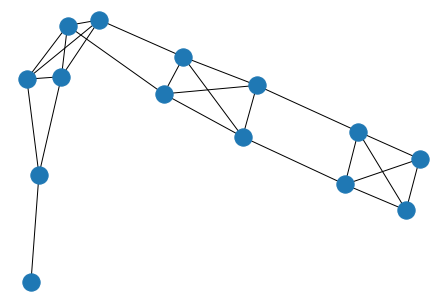

In [3]:
simple_pos = nx.spring_layout(G_simple)
nx.draw(G_simple, pos=simple_pos)

Obtenemos y desplegamos la matriz de adyacencia del grafo

In [4]:
amat_simple = nx.linalg.adjacency_matrix(G_simple)
amat_simple = amat_simple.toarray()
print(amat_simple)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


Hacemos lo propio con la matriz de grado

In [5]:
dmat_simple = np.diag(nx.linalg.laplacian_matrix(G_simple).diagonal())
print(dmat_simple)
print(dmat_simple.diagonal())

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
[3 3 4 4 4 4 4 4 4 4 4 4 3 1]


Finalmente obtenemos y desplegamos la matriz laplaciana

In [6]:
lmat_simple = nx.linalg.laplacian_matrix(G_simple)
lmat_simple = lmat_simple.toarray()
print(lmat_simple)

[[ 3 -1 -1 -1  0  0  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0  0  0]
 [-1 -1  4 -1  0 -1  0  0  0  0  0  0  0  0]
 [-1 -1 -1  4 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  4 -1 -1 -1  0  0  0  0  0  0]
 [ 0  0 -1  0 -1  4 -1 -1  0  0  0  0  0  0]
 [ 0  0  0  0 -1 -1  4 -1 -1  0  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1  4  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  4 -1 -1 -1  0  0]
 [ 0  0  0  0  0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0  0  0  0 -1 -1  4 -1 -1  0]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1  4 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  1]]


Calculamos los vectores y valores propios de la matriz laplaciana

In [7]:
eval_simple, evec_simple = np.linalg.eigh(lmat_simple.astype(np.float64))

Verificamos que las restricciones que

In [8]:
print(np.sum(evec_simple**2, axis=0))
print(np.sum(evec_simple, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-3.74165739e+00  6.27276009e-15 -1.99840144e-15 -6.10622664e-16
 -6.66133815e-16 -2.60624633e-16  1.71000264e-16  8.08271501e-17
  9.85322934e-16 -1.13542967e-16 -1.24900090e-16 -6.24500451e-16
  5.73998205e-16 -2.57592651e-17]


Ordenamos los valores propios de menor a mayor y mantenemos el mismo orden para los vectores propios correspondientes

In [9]:
orden_idx = np.argsort(eval_simple)
eval_simple = eval_simple[orden_idx]
evec_simple = evec_simple[:, orden_idx]

Examinamos los valores propios ordenados

In [10]:
print(eval_simple)

[-5.51642067e-16  2.50758251e-01  7.63932023e-01  1.37332602e+00
  3.24376387e+00  4.00000000e+00  4.00000000e+00  4.00000000e+00
  4.29185335e+00  5.00000000e+00  5.23606798e+00  5.84029852e+00
  6.00000000e+00  6.00000000e+00]


Desplegamos el primer valor propio y su correspondiente vector propio. Nota que el valor propio más pequeño $\approx 0$ y que todos los elementos de su vector propio correspondiente son iguales.

In [11]:
print(eval_simple[0])
print(evec_simple[:, 0])

-5.516420666966831e-16
[-0.26726124 -0.26726124 -0.26726124 -0.26726124 -0.26726124 -0.26726124
 -0.26726124 -0.26726124 -0.26726124 -0.26726124 -0.26726124 -0.26726124
 -0.26726124 -0.26726124]


Visualizamos los elementos del vector propio

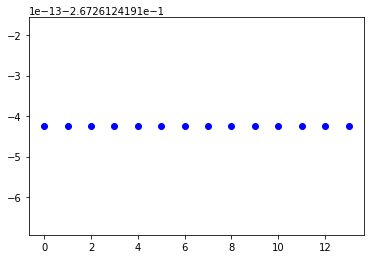

In [12]:
plt.plot(evec_simple[:, 0], 'bo')
plt.show()

In [13]:
print(eval_simple[1])
print(np.sort(evec_simple[:, 1]))

0.25075825126610773
[-0.34711725 -0.34711725 -0.30359599 -0.30359599 -0.14042428 -0.14042428
 -0.04123215 -0.04123215  0.16749141  0.16749141  0.25085327  0.25085327
  0.35467345  0.47337651]


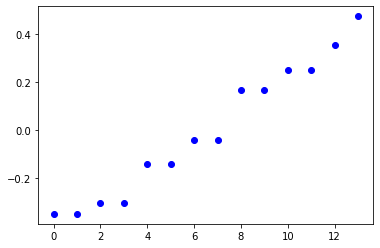

In [14]:
plt.plot(np.sort(evec_simple[:, 1]), 'bo')
plt.show()

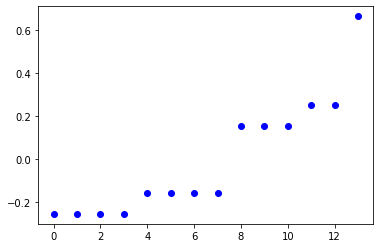

In [15]:
plt.plot(np.sort(evec_simple[:, 2]), 'bo')
plt.show()

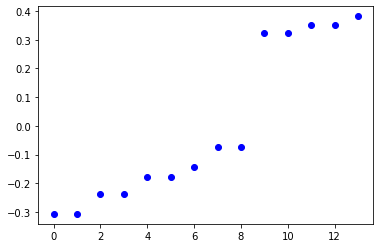

In [16]:
plt.plot(np.sort(evec_simple[:, 3]), 'bo')
plt.show()

In [17]:
evec_simple[:, [1]]

array([[-0.34711725],
       [-0.34711725],
       [-0.30359599],
       [-0.30359599],
       [-0.14042428],
       [-0.14042428],
       [-0.04123215],
       [-0.04123215],
       [ 0.16749141],
       [ 0.16749141],
       [ 0.25085327],
       [ 0.25085327],
       [ 0.35467345],
       [ 0.47337651]])

In [18]:
km_simple = KMeans(n_clusters=3, n_init=100)
km_simple = km_simple.fit(evec_simple[:, [1]])
km_simple.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [19]:
print(G_simple.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


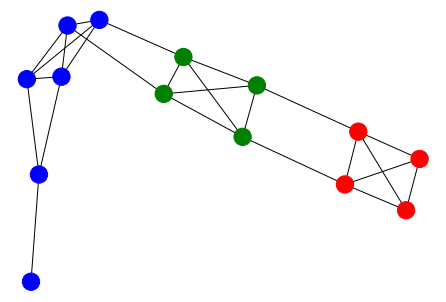

In [20]:
mapa_color = {0:'blue', 1:'red', 2:'green'}
color_vertices = [mapa_color[km_simple.labels_[n]] for n in G_simple]
nx.draw(G_simple, pos=simple_pos, node_color=color_vertices)

In [21]:
sc_simple = SpectralClustering(n_clusters=3, affinity='precomputed', n_init=100)
sc_simple = sc_simple.fit(amat_simple)
sc_simple.labels_

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

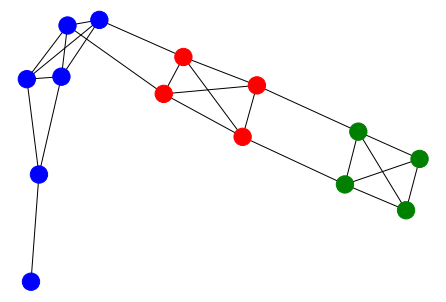

In [22]:
color_vertices = [mapa_color[sc_simple.labels_[n]] for n in G_simple]
nx.draw(G_simple, pos=simple_pos, node_color=color_vertices)

## Club de karate de Zachary


In [23]:
G_karate = nx.karate_club_graph()    

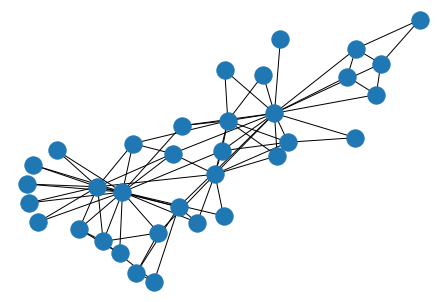

In [24]:
karate_pos = nx.spring_layout(G_karate)
nx.draw(G_karate)

In [25]:
lmat_karate = nx.linalg.laplacian_matrix(G_karate)
amat_karate = nx.linalg.adjacency_matrix(G_karate)
lmat_karate = lmat_karate.toarray()

In [26]:
eval_karate, evec_karate = np.linalg.eigh(lmat_karate.astype(np.float64))

In [27]:
print(np.sum(evec_karate**2, axis=0))
print(np.sum(evec_karate, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 5.83095189e+00 -2.01921813e-14  7.92074739e-15 -6.63358257e-15
 -1.77635684e-15 -7.49400542e-16 -7.58074159e-16 -2.08513762e-15
  3.45817125e-15 -8.93087339e-17  3.25145308e-17  7.07682238e-17
  7.71664492e-17  5.90119315e-17 -1.03389519e-15 -1.40816178e-15
  1.59594560e-16  5.55111512e-17  1.05471187e-15  2.85814596e-15
  8.04911693e-16  1.69555667e-16  3.33066907e-16  1.48145385e-15
 -5.24753851e-16 -7.27314367e-16 -5.46437895e-17  3.05311332e-16
 -1.76941795e-15  3.80251386e-15  2.49800181e-15  1.50573998e-15
  3.05311332e-16 -1.11022302e-15]


In [28]:
orden_idx = np.argsort(eval_karate)
eval_karate = eval_karate[orden_idx]
evec_karate = evec_karate[:, orden_idx]

In [29]:
print(eval_karate)

[2.42080015e-15 4.68525227e-01 9.09247664e-01 1.12501072e+00
 1.25940411e+00 1.59928308e+00 1.76189862e+00 1.82605521e+00
 1.95505045e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.48709173e+00 2.74915718e+00
 3.01396297e+00 3.24206748e+00 3.37615409e+00 3.38196601e+00
 3.47218740e+00 4.27587682e+00 4.48000767e+00 4.58079267e+00
 5.37859508e+00 5.61803399e+00 6.33159222e+00 6.51554463e+00
 6.99619703e+00 9.77724095e+00 1.09210675e+01 1.33061223e+01
 1.70551712e+01 1.81366960e+01]


In [30]:
print(eval_karate[0])
print(evec_karate[:, 0])

2.4208001520994115e-15
[0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859 0.17149859
 0.17149859 0.17149859 0.17149859 0.17149859]


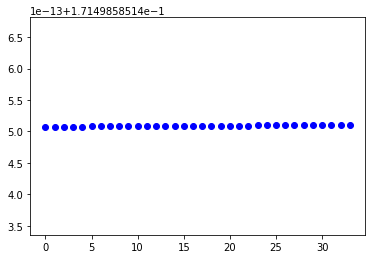

In [31]:
plt.plot(np.sort(evec_karate[:, 0]), 'bo')
plt.show()

In [32]:
print(eval_karate[1])
print(np.sort(evec_karate[:, 1]))

0.46852522670138963
[-0.42276533 -0.32372722 -0.32372722 -0.28460453 -0.28460453 -0.21099295
 -0.11213743 -0.1094613  -0.10018142 -0.10018142 -0.05549978 -0.052586
 -0.04128789 -0.01474197 -0.01363713  0.02321896  0.05160128  0.07349964
  0.09280089  0.0951523   0.09875343  0.11890326  0.12766405  0.13034546
  0.15302558  0.15569457  0.16096292  0.16275078  0.16275078  0.16275078
  0.16275078  0.16275078  0.16765031  0.18710956]


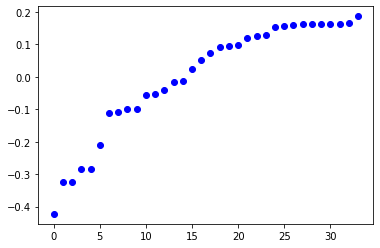

In [33]:
plt.plot(np.sort(evec_karate[:, 1]), 'bo')
plt.show()

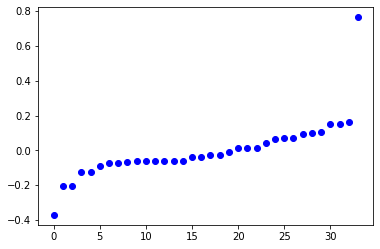

In [34]:
plt.plot(np.sort(evec_karate[:, 2]), 'bo')
plt.show()

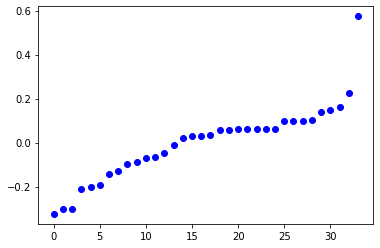

In [35]:
plt.plot(np.sort(evec_karate[:, 3]), 'bo')
plt.show()

In [36]:
km_karate = KMeans(n_clusters=3, n_init=100)
km_karate = km_karate.fit(evec_karate[:, [1]])
km_karate.labels_

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

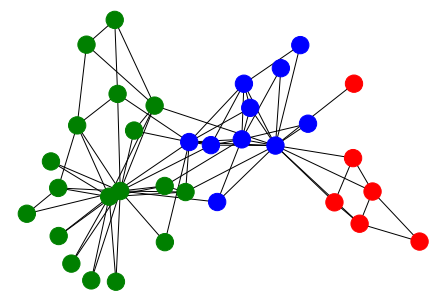

In [37]:
color_vertices = [mapa_color[km_karate.labels_[n]] for n in G_karate]
nx.draw(G_karate, pos=karate_pos, node_color=color_vertices)

In [38]:
sc_karate = SpectralClustering(n_clusters=3, affinity='precomputed', n_init=100)
sc_karate = sc_karate.fit(amat_karate)
sc_karate.labels_

array([2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

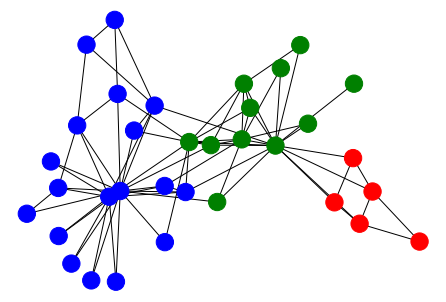

In [39]:
color_vertices = [mapa_color[sc_karate.labels_[n]] for n in G_karate]
nx.draw(G_karate, pos=karate_pos, node_color=color_vertices)

## _Facebook's Social circles_
Aplicamos agrupamiento espectral a los [círculos sociales de Facebook de SNAP](https://snap.stanford.edu/data/ego-Facebook.html)

In [40]:
!wget https://snap.stanford.edu/data/facebook_combined.txt.gz
!gunzip facebook_combined.txt.gz

--2021-06-04 00:58:33--  https://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K  --.-KB/s    in 0.1s    

2021-06-04 00:58:34 (2.13 MB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]



Cargamos el grafo y lo visualizamos

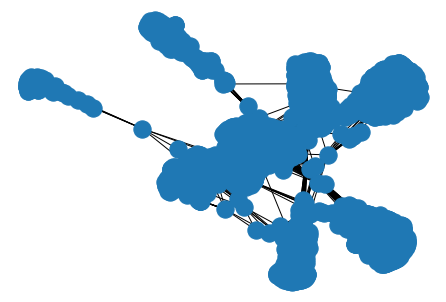

In [41]:
G_large = nx.read_edgelist('facebook_combined.txt')
large_pos = nx.spring_layout(G_large)
nx.draw(G_large, pos=large_pos)

Obtenemos su matriz de adyacencia y le aplicamos agrupamiento espectral para obtener 10 comunidades

In [42]:
amat_large = nx.linalg.adjacency_matrix(G_large)
sc_large = SpectralClustering(n_clusters=10, 
                              affinity='precomputed', 
                              n_init=100)
sc_large = sc_large.fit(amat_large)

Visualizamos las comunidades encontradas

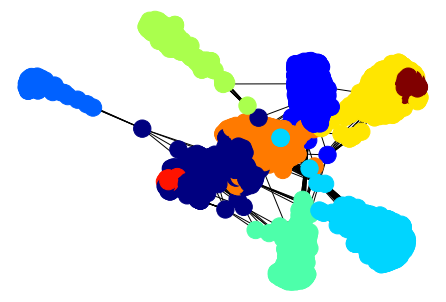

In [43]:
nx.draw(G_large, pos=large_pos, node_color=sc_large.labels_, cmap=plt.cm.jet)